In [1]:
# Enhanced Imports
from keras import models, layers, regularizers, callbacks
from keras.applications import VGG16
import numpy as np
import matplotlib.pyplot as plt
import os, warnings
from PIL import Image
import pandas as pd
import keras

# Suppress Warnings for Cleaner Output
warnings.simplefilter('ignore')

# Data Acquisition Function
def load_data(file_paths):
    return [np.load(path) for path in file_paths]

# Dataset File Paths
data_paths = [
    'C:/Datasets/eda-and-data-preprocessing/train_images.npy',
    'C:/Datasets/eda-and-data-preprocessing/train_labels.npy',
    'C:/Datasets/eda-and-data-preprocessing/train_images_third.npy',
    'C:/Datasets/eda-and-data-preprocessing/train_labels_third.npy',
    'C:/Datasets/eda-and-data-preprocessing/val_images.npy',
    'C:/Datasets/eda-and-data-preprocessing/val_labels.npy',
    'C:/Datasets/eda-and-data-preprocessing/test_images.npy',
    'C:/Datasets/eda-and-data-preprocessing/test_labels.npy'
]

# Load and Explore Data
train_images, train_labels, train_images_third, train_labels_third, val_images, val_labels, test_images, test_labels = load_data(data_paths)
dataset_shapes = {
    "Training": train_images.shape,
    "Validation": val_images.shape,
    "Testing": test_images.shape
}
for key, value in dataset_shapes.items():
    print(f"{key} Data Shape: {value}")

# Visualization Function with Enhanced Structure
def plot_results(history):
    metrics = ['loss', 'accuracy', 'recall', 'auc']
    phases = ['train', 'val']
    plt.figure(figsize=(12, 8))
    for i, metric in enumerate(metrics, 1):
        plt.subplot(2, 2, i)
        for phase in phases:
            plt.plot(history.history[f'{phase}_{metric}'], label=f'{phase} {metric}')
        plt.title(f'Training and Validation {metric.capitalize()}')
        plt.xlabel('Epochs')
        plt.ylabel(metric.capitalize())
        plt.legend()
    plt.tight_layout()
    plt.show()


Training Data Shape: (25803, 128, 128, 3)
Validation Data Shape: (8602, 128, 128, 3)
Testing Data Shape: (3823, 128, 128, 3)


In [5]:
#Explore the dataset again
print ("Number of training samples: " + str(train_images.shape[0]))
print ("A third of training samples: " + str(train_images_third.shape[0]))
print ("Number of validation samples: " + str(val_images.shape[0]))
print ("Number of testing samples: " + str(test_images.shape[0]))
print ("===")
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("A third of train_images shape: " + str(train_images_third.shape))
print ("A third of train_labels shape: " + str(train_labels_third.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))

Number of training samples: 25803
A third of training samples: 8601
Number of validation samples: 8602
Number of testing samples: 3823
===
train_images shape: (25803, 128, 128, 3)
train_labels shape: (25803,)
A third of train_images shape: (8601, 128, 128, 3)
A third of train_labels shape: (8601,)
val_images shape: (8602, 128, 128, 3)
val_labels shape: (8602,)
test_images shape: (3823, 128, 128, 3)
test_labels shape: (3823,)


In [6]:
#Build second CNN model with Dropouts
second_cnn_model = models.Sequential()
second_cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128,  3)))
second_cnn_model.add(layers.MaxPooling2D((2, 2)))
second_cnn_model.add(layers.Dropout(.3))

#2nd Hidden Layer
second_cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer = regularizers.l2(0.005)))
second_cnn_model.add(layers.MaxPooling2D((2, 2))) 
second_cnn_model.add(layers.Dropout(.3))

#3rd Hidden Layer
second_cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer = regularizers.l2(0.005)))
second_cnn_model.add(layers.MaxPooling2D((2, 2)))
second_cnn_model.add(layers.Dropout(.3))

#Flattening Layer
second_cnn_model.add(layers.Flatten()) 
#4th Hidden Layer
second_cnn_model.add(layers.Dense(64, activation='relu', kernel_regularizer = regularizers.l2(0.005)))
#Output Layer
second_cnn_model.add(layers.Dense(1, activation='sigmoid')) 

2021-11-30 02:27:41.546111: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-30 02:27:41.684687: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-30 02:27:41.685374: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-30 02:27:41.686699: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [8]:
#Compile model
second_cnn_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'Recall', 'AUC'])

#Instantiate an EarlyStopping Object
es = EarlyStopping(monitor='val_loss', mode='min', patience=5)
mc = ModelCheckpoint('best_cnn2_model.h5', monitor='val_recall', mode='max', verbose=1, save_best_only=True)

#And fit the model to the training images, validating on the val images
results = second_cnn_model.fit(train_images_third,
                            train_labels_third,
                            epochs=50,
                            batch_size=32,
                            callbacks = [es,mc],
                            validation_data=(val_images, val_labels))

2021-11-30 02:27:46.348029: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1691025408 exceeds 10% of free system memory.
2021-11-30 02:27:48.150301: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1691025408 exceeds 10% of free system memory.
2021-11-30 02:27:49.448439: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2021-11-30 02:27:51.485757: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


269/269 [==============================] - ETA: 0s - loss: 0.5092 - accuracy: 0.8699 - recall: 0.1617 - auc: 0.8110

2021-11-30 02:28:02.429543: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1691222016 exceeds 10% of free system memory.
2021-11-30 02:28:04.231395: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1691222016 exceeds 10% of free system memory.


269/269 [==============================] - 19s 41ms/step - loss: 0.5092 - accuracy: 0.8699 - recall: 0.1617 - auc: 0.8110 - val_loss: 0.4502 - val_accuracy: 0.8920 - val_recall: 0.4871 - val_auc: 0.8792

Epoch 00001: val_recall improved from -inf to 0.48710, saving model to best_cnn2_model.h5
Epoch 2/50
269/269 [==============================] - 5s 18ms/step - loss: 0.3189 - accuracy: 0.8923 - recall: 0.4002 - auc: 0.8737 - val_loss: 0.4878 - val_accuracy: 0.8558 - val_recall: 0.7764 - val_auc: 0.8713

Epoch 00002: val_recall improved from 0.48710 to 0.77639, saving model to best_cnn2_model.h5
Epoch 3/50
269/269 [==============================] - 5s 18ms/step - loss: 0.3016 - accuracy: 0.8973 - recall: 0.4584 - auc: 0.8830 - val_loss: 0.4432 - val_accuracy: 0.8547 - val_recall: 0.7850 - val_auc: 0.8553

Epoch 00003: val_recall improved from 0.77639 to 0.78499, saving model to best_cnn2_model.h5
Epoch 4/50
269/269 [==============================] - 5s 17ms/step - loss: 0.2928 - accuracy

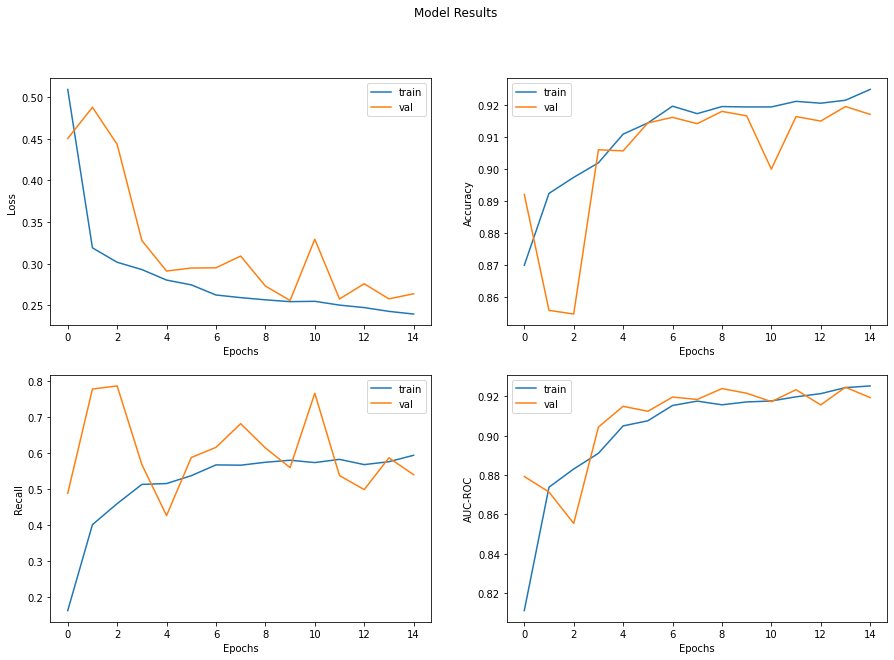

In [9]:
plot_results(results)

In [10]:
#Save Weights
second_cnn_model.save_weights('cnn2_model_weights.h5')